# Huawei Private Cloud dataset release demo notebook

This notebook explains how to load and use the Huawei Private dataset.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from tqdm import tqdm
import os
import gc

In [2]:
# define home dir
rt = 'datasets/private_dataset/'
print('Reading from directory: {}'.format(rt))

Reading from directory: datasets/private_dataset/


In [3]:
# get all per-second requests files

filenames_list = glob(rt+'/requests_second/*.csv')
filenames_list.sort()
print(filenames_list[:5])
print('We have {} requests per second filenames'.format(len(filenames_list)))

['datasets/private_dataset//requests_second/day_000.csv', 'datasets/private_dataset//requests_second/day_001.csv', 'datasets/private_dataset//requests_second/day_002.csv', 'datasets/private_dataset//requests_second/day_003.csv', 'datasets/private_dataset//requests_second/day_004.csv']
We have 141 requests per second filenames


In [4]:
# reading the all per-second requests files may take up to 40GB of memory
dfs_list = []
for filename in tqdm(filenames_list):
    # read the entire file, or read just the columns we want by passing usecols = ['time', 'day', 0, 1, 2] to pd.read_csv()
    # df_i = pd.read_csv(filename, index_col=None)
    df_i = pd.read_csv(filename, index_col=None, usecols = ['time', 'day', '33', '75', '160', '150', '161', '55', '66', '72', '164', '28'])
    dfs_list.append(df_i)

100%|██████████| 141/141 [00:36<00:00,  3.87it/s]


In [5]:
df_requests = pd.concat(dfs_list)
df_requests

,day,time,28,33,55,66,72,75,150,160,161,164
0,0,0,816.0,NaN,NaN,1964.0,7614.0,22359.0,9425.0,6997.0,4690.0,1194.0
1,0,1,960.0,NaN,NaN,2013.0,9883.0,26684.0,9699.0,7434.0,4884.0,1223.0
2,0,2,1069.0,NaN,NaN,2024.0,12660.0,29264.0,10688.0,7709.0,5267.0,1308.0
3,0,3,922.0,NaN,NaN,2042.0,12403.0,27607.0,10624.0,7691.0,5228.0,1267.0
4,0,4,945.0,NaN,NaN,2082.0,12808.0,25907.0,10538.0,7811.0,5122.0,1328.0
...,...,...,...,...,...,...,...,...,...,...,...,...
86395,234,20303995,1745.0,67449.0,NaN,3189.0,2337.0,24404.0,12024.0,8274.0,5591.0,1472.0
86396,234,20303996,1767.0,66931.0,NaN,2694.0,2210.0,24121.0,11926.0,8107.0,5476.0,1272.0
86397,234,20303997,1761.0,66561.0,NaN,2571.0,2227.0,23970.0,11731.0,8459.0,5615.0,1238.0
86398,234,20303998,1702.0,66121.0,NaN,2665.0,2295.0,24375.0,12033.0,8323.0,5606.0,1325.0


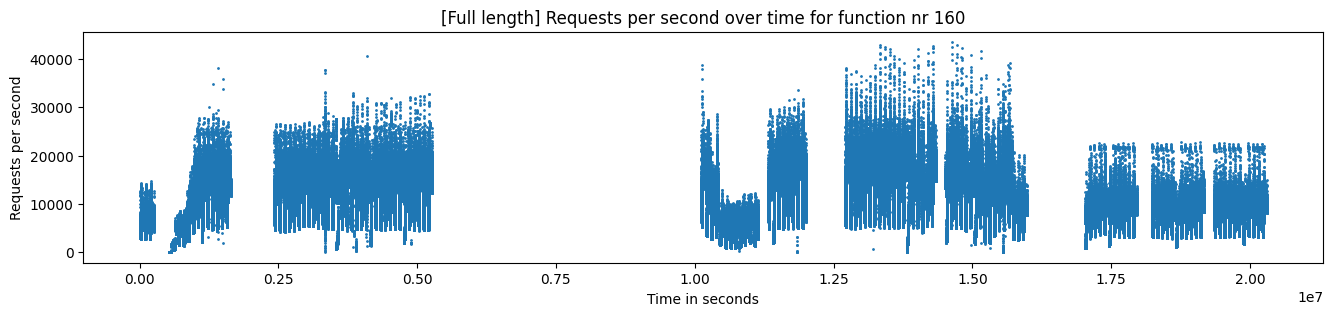

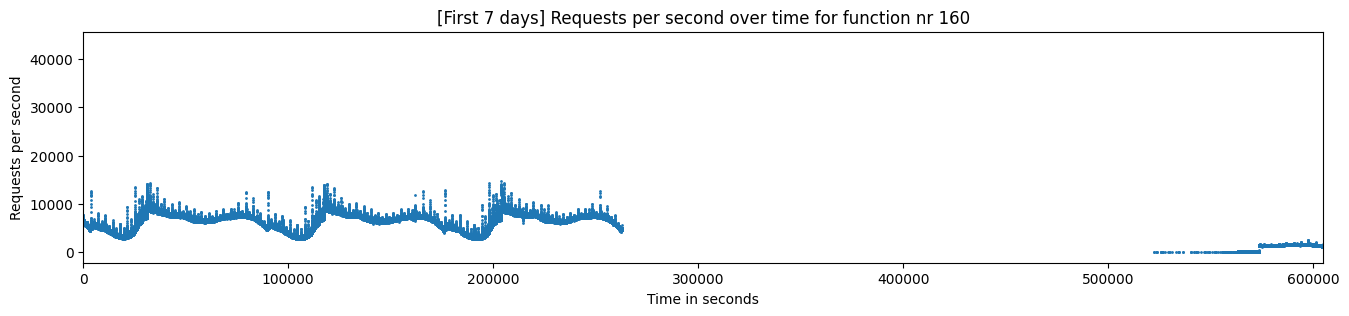

In [6]:
fn_nr = 160

fig = plt.figure(figsize=(16, 3))

plt.scatter(df_requests['time'], df_requests[str(fn_nr)], s=1)
plt.xlabel('Time in seconds')
plt.ylabel('Requests per second')
plt.title('[Full length] Requests per second over time for function nr {}'.format(fn_nr))
plt.show()

n_days = 7
fig = plt.figure(figsize=(16, 3))
plt.scatter(df_requests['time'], df_requests[str(fn_nr)], s=1)
plt.xlabel('Time in seconds')
plt.ylabel('Requests per second')
plt.title('[First {} days] Requests per second over time for function nr {}'.format(n_days, str(fn_nr)))
plt.xlim(0, 86400*n_days)
plt.show()

In [ ]:
# get all per-second requests files

filenames_list = glob(rt+'/requests_minute/*.csv')
filenames_list.sort()
print(filenames_list[:5])
print('We have {} requests per second filenames'.format(len(filenames_list)))

['datasets/private_dataset//requests_minute/day_000.csv', 'datasets/private_dataset//requests_minute/day_001.csv', 'datasets/private_dataset//requests_minute/day_002.csv', 'datasets/private_dataset//requests_minute/day_003.csv', 'datasets/private_dataset//requests_minute/day_004.csv']
We have 141 requests per second filenames


In [8]:
# reading the all per-second requests files may take up to 40GB of memory
dfs_list = []
for filename in tqdm(filenames_list):
    # read the entire file, or read just the columns we want by passing usecols = ['time', 'day', 0, 1, 2] to pd.read_csv()
    df_i = pd.read_csv(filename, index_col=None)
    dfs_list.append(df_i)

100%|██████████| 141/141 [00:03<00:00, 41.10it/s]


In [9]:
df_requests_minute = pd.concat(dfs_list)
df_requests_minute

,day,time,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,0,0,NaN,NaN,NaN,NaN,6.0,6.0,98.0,NaN,...,833.0,NaN,NaN,NaN,2891,24.0,NaN,NaN,NaN,23.0
1,0,60,NaN,NaN,NaN,NaN,29.0,29.0,83.0,NaN,...,752.0,NaN,NaN,NaN,2607,16.0,NaN,NaN,NaN,23.0
2,0,120,NaN,NaN,NaN,NaN,12.0,12.0,72.0,NaN,...,835.0,NaN,NaN,NaN,2598,9.0,NaN,NaN,NaN,25.0
3,0,180,NaN,NaN,NaN,NaN,18.0,18.0,106.0,NaN,...,1005.0,NaN,NaN,NaN,2617,17.0,NaN,NaN,NaN,28.0
4,0,240,NaN,NaN,NaN,NaN,4.0,4.0,154.0,NaN,...,858.0,NaN,NaN,NaN,2572,26.0,NaN,NaN,NaN,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,234,20303700,NaN,264.0,152.0,NaN,NaN,NaN,136.0,NaN,...,NaN,NaN,NaN,NaN,33038,14.0,NaN,NaN,NaN,19.0
1436,234,20303760,NaN,278.0,155.0,NaN,NaN,NaN,85.0,NaN,...,NaN,NaN,NaN,NaN,33013,18.0,NaN,NaN,NaN,28.0
1437,234,20303820,NaN,260.0,150.0,NaN,NaN,NaN,125.0,NaN,...,NaN,NaN,NaN,NaN,32686,8.0,NaN,NaN,NaN,26.0
1438,234,20303880,NaN,279.0,140.0,NaN,NaN,NaN,129.0,NaN,...,NaN,NaN,NaN,NaN,31737,13.0,NaN,NaN,NaN,37.0


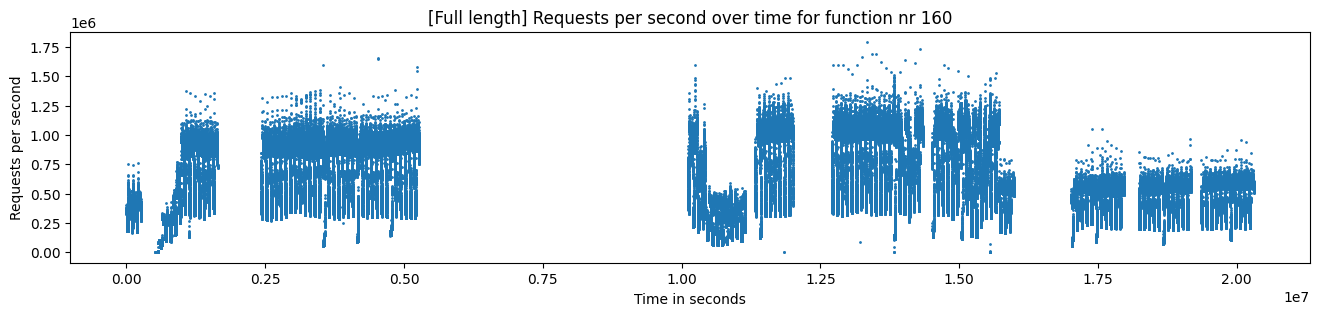

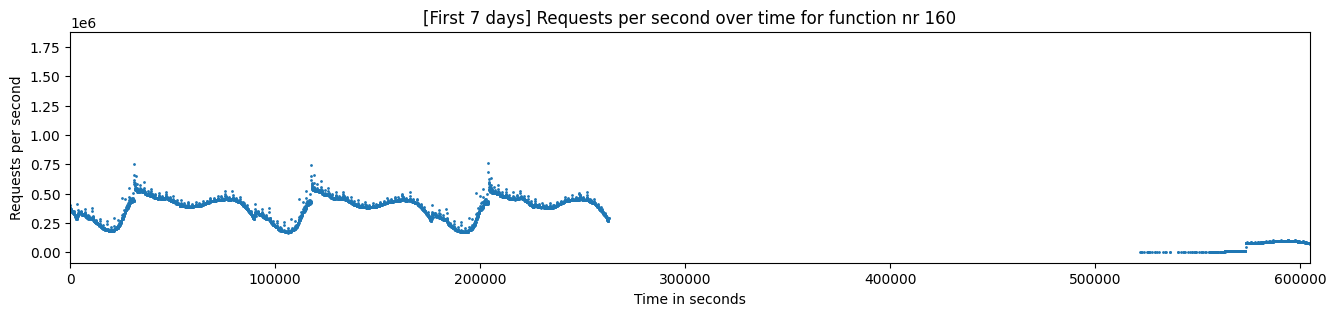

In [10]:
fn_nr = 160

fig = plt.figure(figsize=(16, 3))

plt.scatter(df_requests_minute['time'], df_requests_minute[str(fn_nr)], s=1)
plt.xlabel('Time in seconds')
plt.ylabel('Requests per second')
plt.title('[Full length] Requests per second over time for function nr {}'.format(fn_nr))
plt.show()

n_days = 7
fig = plt.figure(figsize=(16, 3))
plt.scatter(df_requests_minute['time'], df_requests_minute[str(fn_nr)], s=1)
plt.xlabel('Time in seconds')
plt.ylabel('Requests per second')
plt.title('[First {} days] Requests per second over time for function nr {}'.format(n_days, str(fn_nr)))
plt.xlim(0, 86400*n_days)
plt.show()

### Per-second vs per-minute plots

This section shows how we can compare per-second and per-minute data.

The original requests data is per second. To get per-minute data, we ADDED the number of requests in non-overlapping 60-second windows.

Since all timestamps are in seconds, we can plot per-second and per-minute data on the same plot to see the effect of the aggregation. We add large blue markers to the per-minute plot to show the exact locations of the aggregated points.

In [11]:
# read per-second and per-minute requests files for the same day
df_req_sec = pd.read_csv(rt + '/requests_second/day_000.csv')
df_req_min = pd.read_csv(rt + '/requests_minute/day_000.csv')

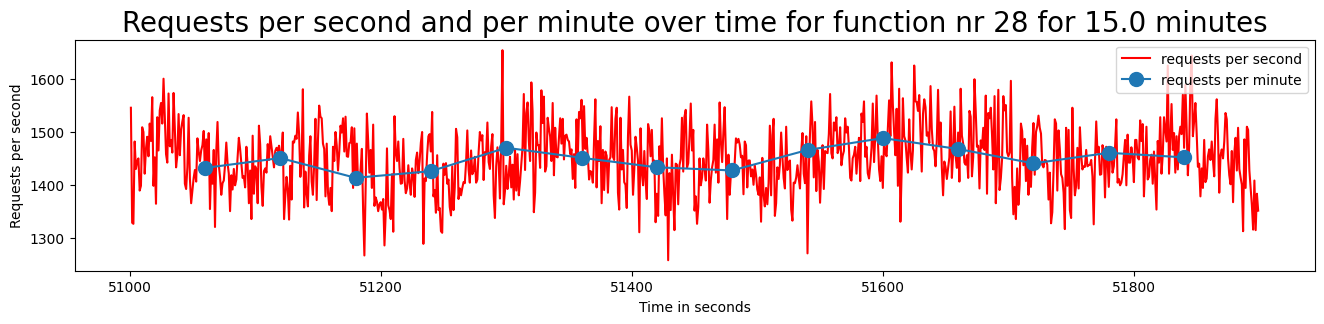

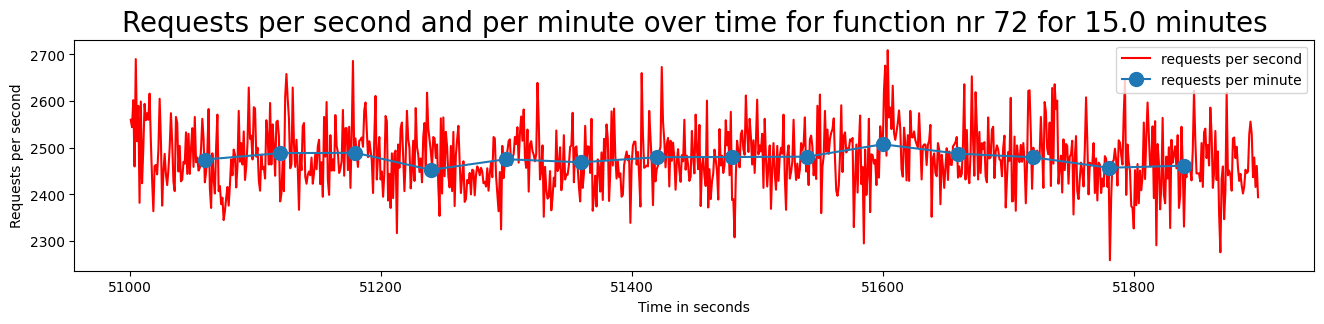

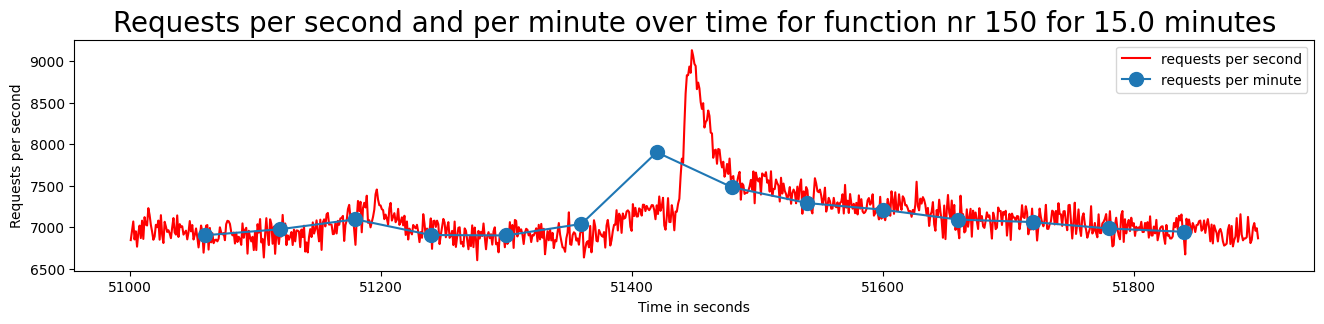

In [12]:
# pick some nice functions to visualise
fn_nrs_list = ['28', '72', '150']

# define an interval to zoom in on with of size 'gap' in seconds
start = int(51000)
gap = 60*60*0.25            
end = start + gap

# slice dataframes
df_req_sec_slice = df_req_sec[(df_req_sec['time']<end) & (df_req_sec['time']>start)]
df_req_min_slice = df_req_min[(df_req_min['time']<end) & (df_req_min['time']>start)]


for fn_nr in fn_nrs_list:
    fig = plt.figure(figsize=(16, 3))

    plt.plot(df_req_sec_slice['time'], df_req_sec_slice[fn_nr], color='red', label='requests per second')

    #note that we need to divide requests per minute by 60 because the aggregated version has been SUMMED
    plt.plot(df_req_min_slice['time'], df_req_min_slice[fn_nr]/(60), label='requests per minute', marker=".", markersize=20)
    plt.legend(loc='upper right')
    plt.xlabel('Time in seconds')
    plt.ylabel('Requests per second')
    plt.title('Requests per second and per minute over time for function nr {} for {} minutes'.format(fn_nr, (end-start)/60), fontsize=20)
    plt.show()

### Visualising CPU usage

Just like requests, we can visualise CPU usage over time

In [13]:
filenames_list = glob(rt+'/cpu_usage_minute/*.csv')
filenames_list.sort()
print(filenames_list[:5])
print('We have {} cpu per minute filenames'.format(len(filenames_list)))

dfs_list = []
for filename in tqdm(filenames_list):
    df_i = pd.read_csv(filename, index_col=None)
    dfs_list.append(df_i)

df_cpu_usage = pd.concat(dfs_list)
df_cpu_usage

['datasets/private_dataset//cpu_usage_minute/day_000.csv', 'datasets/private_dataset//cpu_usage_minute/day_001.csv', 'datasets/private_dataset//cpu_usage_minute/day_002.csv', 'datasets/private_dataset//cpu_usage_minute/day_003.csv', 'datasets/private_dataset//cpu_usage_minute/day_004.csv']
We have 141 cpu per minute filenames


  0%|          | 0/141 [00:00<?, ?it/s]

100%|██████████| 141/141 [00:03<00:00, 36.08it/s]


,day,time,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,0,0,NaN,NaN,NaN,NaN,0.003,0.003,0.003,NaN,...,0.005,NaN,NaN,NaN,0.056,0.044,NaN,NaN,NaN,0.001
1,0,60,NaN,NaN,NaN,NaN,0.004,0.004,0.004,NaN,...,0.005,NaN,NaN,NaN,0.056,0.028,NaN,NaN,NaN,0.001
2,0,120,NaN,NaN,NaN,NaN,0.003,0.003,0.003,NaN,...,0.005,NaN,NaN,NaN,0.056,0.017,NaN,NaN,NaN,0.002
3,0,180,NaN,NaN,NaN,NaN,0.004,0.003,0.004,NaN,...,0.005,NaN,NaN,NaN,0.053,0.010,NaN,NaN,NaN,0.001
4,0,240,NaN,NaN,NaN,NaN,0.003,0.004,0.004,NaN,...,0.005,NaN,NaN,NaN,0.058,0.028,NaN,NaN,NaN,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,234,20303700,NaN,0.010,0.009,NaN,NaN,NaN,0.004,NaN,...,NaN,NaN,NaN,NaN,0.068,0.015,NaN,NaN,NaN,0.001
1436,234,20303760,NaN,0.015,0.008,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,0.066,0.020,NaN,NaN,NaN,0.002
1437,234,20303820,NaN,0.014,0.015,NaN,NaN,NaN,0.004,NaN,...,NaN,NaN,NaN,NaN,0.067,0.012,NaN,NaN,NaN,0.002
1438,234,20303880,NaN,0.013,0.009,NaN,NaN,NaN,0.004,NaN,...,NaN,NaN,NaN,NaN,0.068,0.021,NaN,NaN,NaN,0.002


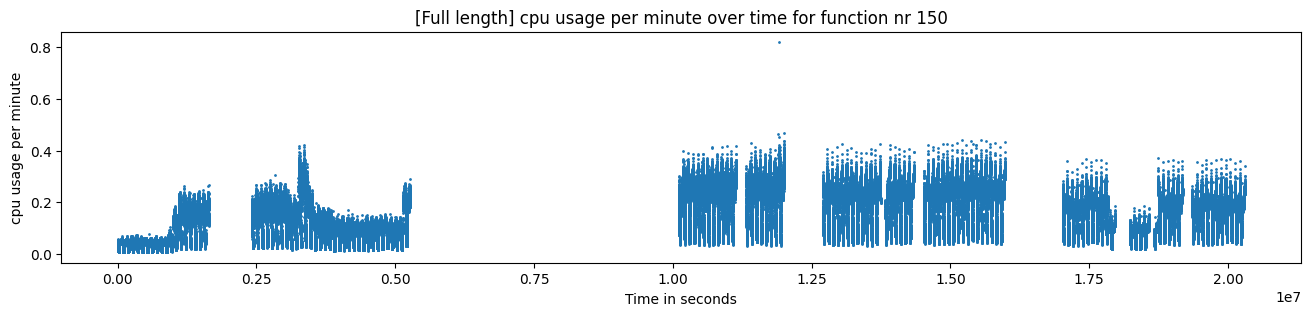

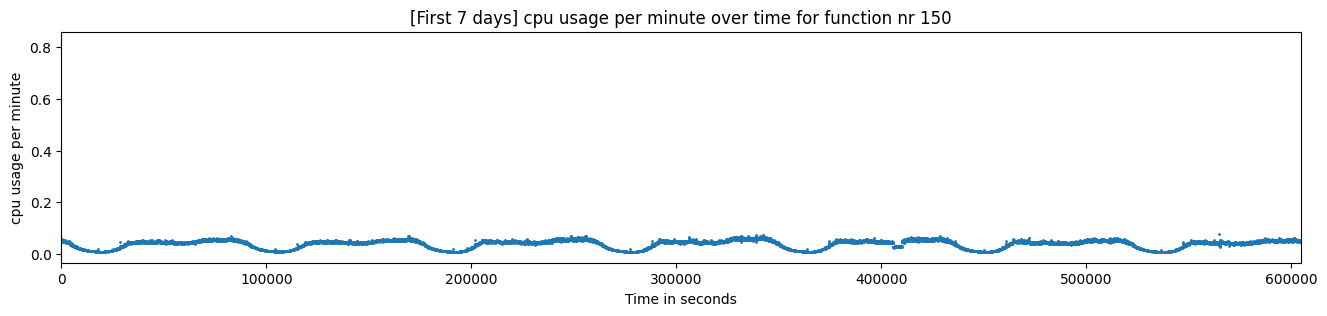

In [14]:
fig = plt.figure(figsize=(16, 3))

plt.scatter(df_cpu_usage['time'], df_cpu_usage['150'], s=1)
plt.xlabel('Time in seconds')
plt.ylabel('cpu usage per minute')
plt.title('[Full length] cpu usage per minute over time for function nr 150')
plt.show()

n_days = 7
fig = plt.figure(figsize=(16, 3))
plt.scatter(df_cpu_usage['time'], df_cpu_usage['150'], s=1)
plt.xlabel('Time in seconds')
plt.ylabel('cpu usage per minute')
plt.title('[First {} days] cpu usage per minute over time for function nr 150'.format(n_days))
plt.xlim(0, 86400*n_days)
plt.show()